In [30]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [31]:
!unzip /content/drive/MyDrive/Colab\ Notebooks/Projects/TensorFlow/Todo/CNN/Garbage-Classification-V2/data.zip

In [32]:
models_to_try = [
    ['efficentnetb2','https://tfhub.dev/tensorflow/efficientnet/b2/feature-vector/1'],
    ['efficentnetb7','https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1'],
    ['efficentnetb5','https://tfhub.dev/tensorflow/efficientnet/b5/feature-vector/1'],
    ['efficentnetb0','https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1'],
    ['efficentnetb4','https://tfhub.dev/tensorflow/efficientnet/b4/feature-vector/1'],
    ['efficentnetb3','https://tfhub.dev/tensorflow/efficientnet/b3/feature-vector/1'],
    ['efficentnetb1','https://tfhub.dev/tensorflow/efficientnet/b1/feature-vector/1'],
    ['efficentnetb6','https://tfhub.dev/tensorflow/efficientnet/b6/feature-vector/1'],
    ['resnet50','https://tfhub.dev/tensorflow/resnet_50/feature_vector/1'],
    ['resnet_v2_152','https://tfhub.dev/google/imagenet/resnet_v2_152/feature_vector/4'],
    ['resnet_v1_152','https://tfhub.dev/google/imagenet/resnet_v1_152/feature_vector/4'],
    ['resnet_v1_50','https://tfhub.dev/google/imagenet/resnet_v1_50/feature_vector/4'],
    ['resnet_v1_101','https://tfhub.dev/google/imagenet/resnet_v1_101/feature_vector/4'],
    ['inception_resnet_v2','https://tfhub.dev/google/imagenet/inception_resnet_v2/feature_vector/4'],
    ['inception_v1','https://tfhub.dev/google/imagenet/inception_v1/feature_vector/4'],
    ['inception_v3','https://tfhub.dev/google/imagenet/inception_v3/feature_vector/4'],
    ['mobilenet_v2','https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'],
    ['mobilenet_v3_large_100_224','https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/feature_vector/5'],
    ['mobilenet_v2_100_224','https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4'],
    ['mobilenet_v2_140_224','https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4'],
    ['mobilenet_v1_100_224','https://tfhub.dev/google/imagenet/mobilenet_v1_100_224/feature_vector/4'],
    ['mobilenet_v3_small_100_224','https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/feature_vector/5'],
    ['pnasnet_large','https://tfhub.dev/google/imagenet/pnasnet_large/feature_vector/4'],
]

# Becoming one with the data

In [33]:
import os

In [34]:
for dirpath, dirnames, filenames in os.walk("garbage_classification"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 12 directories and 0 images in 'garbage_classification'.
There are 0 directories and 629 images in 'garbage_classification/green-glass'.
There are 0 directories and 769 images in 'garbage_classification/metal'.
There are 0 directories and 5325 images in 'garbage_classification/clothes'.
There are 0 directories and 607 images in 'garbage_classification/brown-glass'.
There are 0 directories and 775 images in 'garbage_classification/white-glass'.
There are 0 directories and 945 images in 'garbage_classification/battery'.
There are 0 directories and 697 images in 'garbage_classification/trash'.
There are 0 directories and 865 images in 'garbage_classification/plastic'.
There are 0 directories and 1977 images in 'garbage_classification/shoes'.
There are 0 directories and 891 images in 'garbage_classification/cardboard'.
There are 0 directories and 1050 images in 'garbage_classification/paper'.
There are 0 directories and 985 images in 'garbage_classification/biological'.


In [35]:
import random

In [36]:
data_dir = '/content/garbage_classification'

In [37]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

How many imgs ? 1
green-glass
green-glass616.jpg
/content/garbage_classification/green-glass/green-glass616.jpg


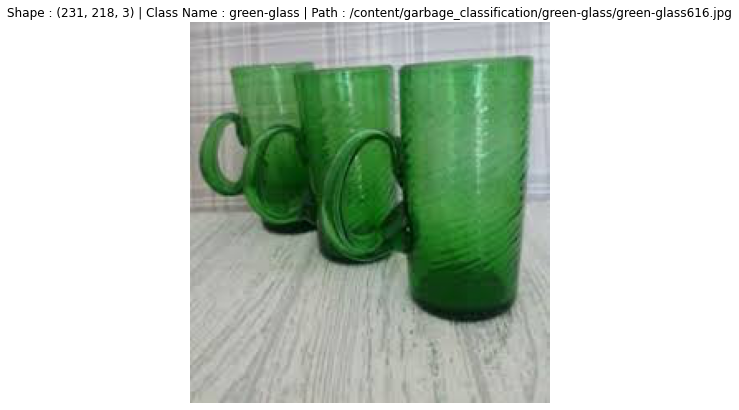

In [38]:
how_many_imgs = int(input('How many imgs ? '))
for _ in range(how_many_imgs):
  random_class = random.choice(os.listdir(data_dir))
  print(random_class)
  random_file = random.choice(os.listdir(f'{data_dir}/{random_class}'))
  print(random_file)
  path = f"{data_dir}/{random_class}/{random_file}"
  print(path)
  img = mpimg.imread(path)
  img = img / 255
  plt.figure(figsize=(10,7))
  plt.imshow(img)
  plt.axis(False)
  plt.title(f'Shape : {img.shape} | Class Name : {random_class} | Path : {path}')
  plt.show();

In [39]:
class_names = os.listdir('/content/garbage_classification')

In [40]:
class_names = os.listdir('/content/garbage_classification')
total_imgs = -1
for class_name in class_names:
  total_imgs = total_imgs + len(os.listdir(f'{data_dir}/{class_name}'))

In [41]:
total_imgs

15514

# Load the imgs

In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [43]:
datagen = ImageDataGenerator(rescale=1/255.0,width_shift_range=0.25,height_shift_range=0.25,zoom_range=0.25,shear_range=0.25,horizontal_flip=True,vertical_flip=True,validation_split=0.99)
train_data = datagen.flow_from_directory(data_dir,target_size=(224,224),subset='training')
test_data = datagen.flow_from_directory(data_dir,target_size=(224,224),subset='validation')

Found 160 images belonging to 12 classes.
Found 15355 images belonging to 12 classes.


# Classification vs Custom CNN vs Transfer Learning CNN

Which is better ? 

In [44]:
!pip install -U --pre wandb

Requirement already up-to-date: wandb in /usr/local/lib/python3.7/dist-packages (0.10.24)


In [45]:
!pip3 install wandb --upgrade

Requirement already up-to-date: wandb in /usr/local/lib/python3.7/dist-packages (0.10.24)


In [46]:
!pip3 install wandb

In [47]:
import wandb
from wandb.keras import WandbCallback
import tensorflow as tf
import tensorflow_hub as hub

## Classification

In [48]:
# wandb.init(project="Garbage-Classification-V2",name='classification')
# model = tf.keras.Sequential([
#   tf.keras.layers.Flatten(input_shape=(224,224,3)),
#   tf.keras.layers.Dense(4, activation="relu"),
#   tf.keras.layers.Dense(4, activation="relu"),
#   tf.keras.layers.Dense(len(class_names),activation='softmax')
# ])
# model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
# model.fit(train_data,validation_data=(test_data),epochs=25,callbacks=[WandbCallback(save_model=False)])

## CNN (Custom)

In [49]:
# wandb.init(project="Garbage-Classification-V2",name='cnn_custom')
# model = tf.keras.Sequential([
#   tf.keras.layers.Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
#   tf.keras.layers.MaxPool2D(),
#   tf.keras.layers.Conv2D(10,3,activation='relu'),
#   tf.keras.layers.MaxPool2D(),
#   tf.keras.layers.Conv2D(10,3,activation='relu'),
#   tf.keras.layers.Flatten(),
#   tf.keras.layers.Dense(len(class_names),activation='softmax')
# ])
# model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
# model.fit(train_data,validation_data=(test_data),epochs=25,callbacks=[WandbCallback(save_model=False)])

## Transfer Learning

In [50]:
models_to_try[0][1]

'https://tfhub.dev/tensorflow/efficientnet/b2/feature-vector/1'

In [51]:
models_to_try[0][0]

'efficentnetb2'

In [52]:
# wandb.init(project="Garbage-Classification-V2",name=f'transfer_learning_{models_to_try[0][0]}')
# tl_layer = hub.KerasLayer(models_to_try[0][1],trainable=False,input_shape=(224,224,3))
# model = tf.keras.Sequential([
#   tl_layer,
#   tf.keras.layers.Dense(len(class_names),activation='softmax')
# ])
# model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
# model.fit(train_data,validation_data=(test_data),epochs=25,callbacks=[WandbCallback(save_model=False)])

## Classification vs CNN (Custom) vs Transfer Learning

What is better ? 
**The best is `Transfer Learning`**

# Since I am using `Transfer Learning` I will start experimenting with it

I dont have much time becuase I have to build my deep learning PC and Colab with probably timeout
So I am going to be using the `mobilenet_v3_large_100_224`

In [53]:
model_url = ['mobilenet_v3_large_100_224','https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/feature_vector/5']

In [54]:
datagen = ImageDataGenerator(rescale=1/255.0,width_shift_range=0.25,height_shift_range=0.25,zoom_range=0.25,shear_range=0.25,horizontal_flip=True,vertical_flip=True,validation_split=0.25)
train_data = datagen.flow_from_directory(data_dir,target_size=(224,224),subset='training')
test_data = datagen.flow_from_directory(data_dir,target_size=(224,224),subset='validation')

Found 11641 images belonging to 12 classes.
Found 3874 images belonging to 12 classes.


In [55]:
# wandb.init(project="Garbage-Classification-V2",name=f'big_dog_model_{model_url[0]}')
# tl_layer = hub.KerasLayer(model_url[1],trainable=False,input_shape=(224,224,3))
# model = tf.keras.Sequential([
#   tl_layer,
#   tf.keras.layers.Dense(len(class_names),activation='softmax')
# ])
# model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
# model.fit(train_data,validation_data=(test_data),epochs=7,callbacks=[WandbCallback(),tf.keras.callbacks.EarlyStopping(patience=3)])
# model.save('/content/drive/MyDrive/Colab Notebooks/Projects/TensorFlow/Todo/CNN/Garbage-Classification-V2/model.h5')

# Test the model in real world problem

In [68]:
class_names = ['battery','biological','brown-glass','cardboard','cloaths','green-glass','metal','paper','plastic','shoes','trash','white-glass']

In [69]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Projects/TensorFlow/Todo/CNN/Garbage-Classification-V2/model.h5',custom_objects={'KerasLayer':hub.KerasLayer})

In [70]:
test_imgs = os.listdir('/content/test')

In [71]:
from keras_preprocessing import image
import numpy as np

In [72]:
for test_img in test_imgs:
  img = image.load_img(f"/content/test/{test_img}", target_size=(224, 224))
  img = image.img_to_array(img)
  img = img / 255.0
  preds = model.predict(np.expand_dims(img, axis=0))
  print(preds)
  plt.figure(figsize=(10,7))
  plt.imshow(img)
  # plt.title(f'{class_names[tf.round(preds)]}')
  plt.title(f'{class_names[preds.argmax()]}')
  plt.axis(False)
  plt.show();

Output hidden; open in https://colab.research.google.com to view.

# Done